# **Wine dataset classification**

This dataset is extracted from UCI Machine learning repository

http://archive.ics.uci.edu/ml/datasets/Wine

Info:  
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

***

## <font color="Blue">**Contents of report**</font>
### 1. Data overall 
>##### 1.1 DATASET COLUMNS FEATURE EXPLAIN
>##### 1.2 Data describe
>##### 1.3 EDA(Exploratory Data Analysis)
### 2. Classification
>##### 2.1 Features
>##### 2.2 Target
>##### 2.3 Train-test split    



### FURTHER STUDY
- Why classification model provided differences?
- Closs varidation(k-fold)
- unsupervised learning(PCA, LDA)

***


### 1.Data overall
#### 1.1 DATASET COLUMNS FEATURE EXPLAIN

- Alcohol: アルコール 
- Malic acid: リンゴ酸
- Ash: 灰
- Alcalinity of ash: 灰のアルカリ性 
- Magnesium: マグネシウム
- Total phenols: フェノール類全量
- Flavanoids: フラバノイド
- Nonflavanoid phenols: 非フラバノイドフェノール類
- Proanthocyanins: プロアントシアニン
- Color intensity: 色彩強度
- Hue: 色調
- OD280/OD315 of diluted wines: 蒸留ワインのOD280/OD315 
- Proline: プロリン

#### 1.2 Data describe

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='deep')
# default is style='darkgrid', palette='deep'

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
#header=Noneにすると，列名を勝手に割り当ててくれる
df = pd.read_csv("wine_data.csv", header=None)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
df.columns = ['Class label',
                   'Alcohol',
                   'Malic acid',
                   'Ash',
                   'Alcalinity of ash',
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Non flavanoid Phenols',
                   'Proanthocyanins',
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline'
                  ]

In [0]:
print('Data first 5 rows show\n')
df.head()

Data first 5 rows show



,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non flavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
#class labelのencoding
# Class label 1:0, 2:1, 3:2

from sklearn.preprocessing import LabelEncoder

#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#ラベルを覚えさせる
le = le.fit(df['Class label'])
#ラベルを整数に変換
df['Class label'] = le.transform(df['Class label'])
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non flavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
#欠損値をカウント
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Non flavanoid Phenols           0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [0]:
#基礎統計量の算出
print('Data show describe\n')
df.describe().round(3)

Data show describe



,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non flavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,0.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,0.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,0.000,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,1.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,2.000,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,2.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


In [0]:
print('Data show info\n')
df.info()

Data show info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class label                     178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Non flavanoid Phenols           178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


#### 1.3 EDA(Exploratory Data Analysis)

In [0]:
cols =['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Non flavanoid Phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

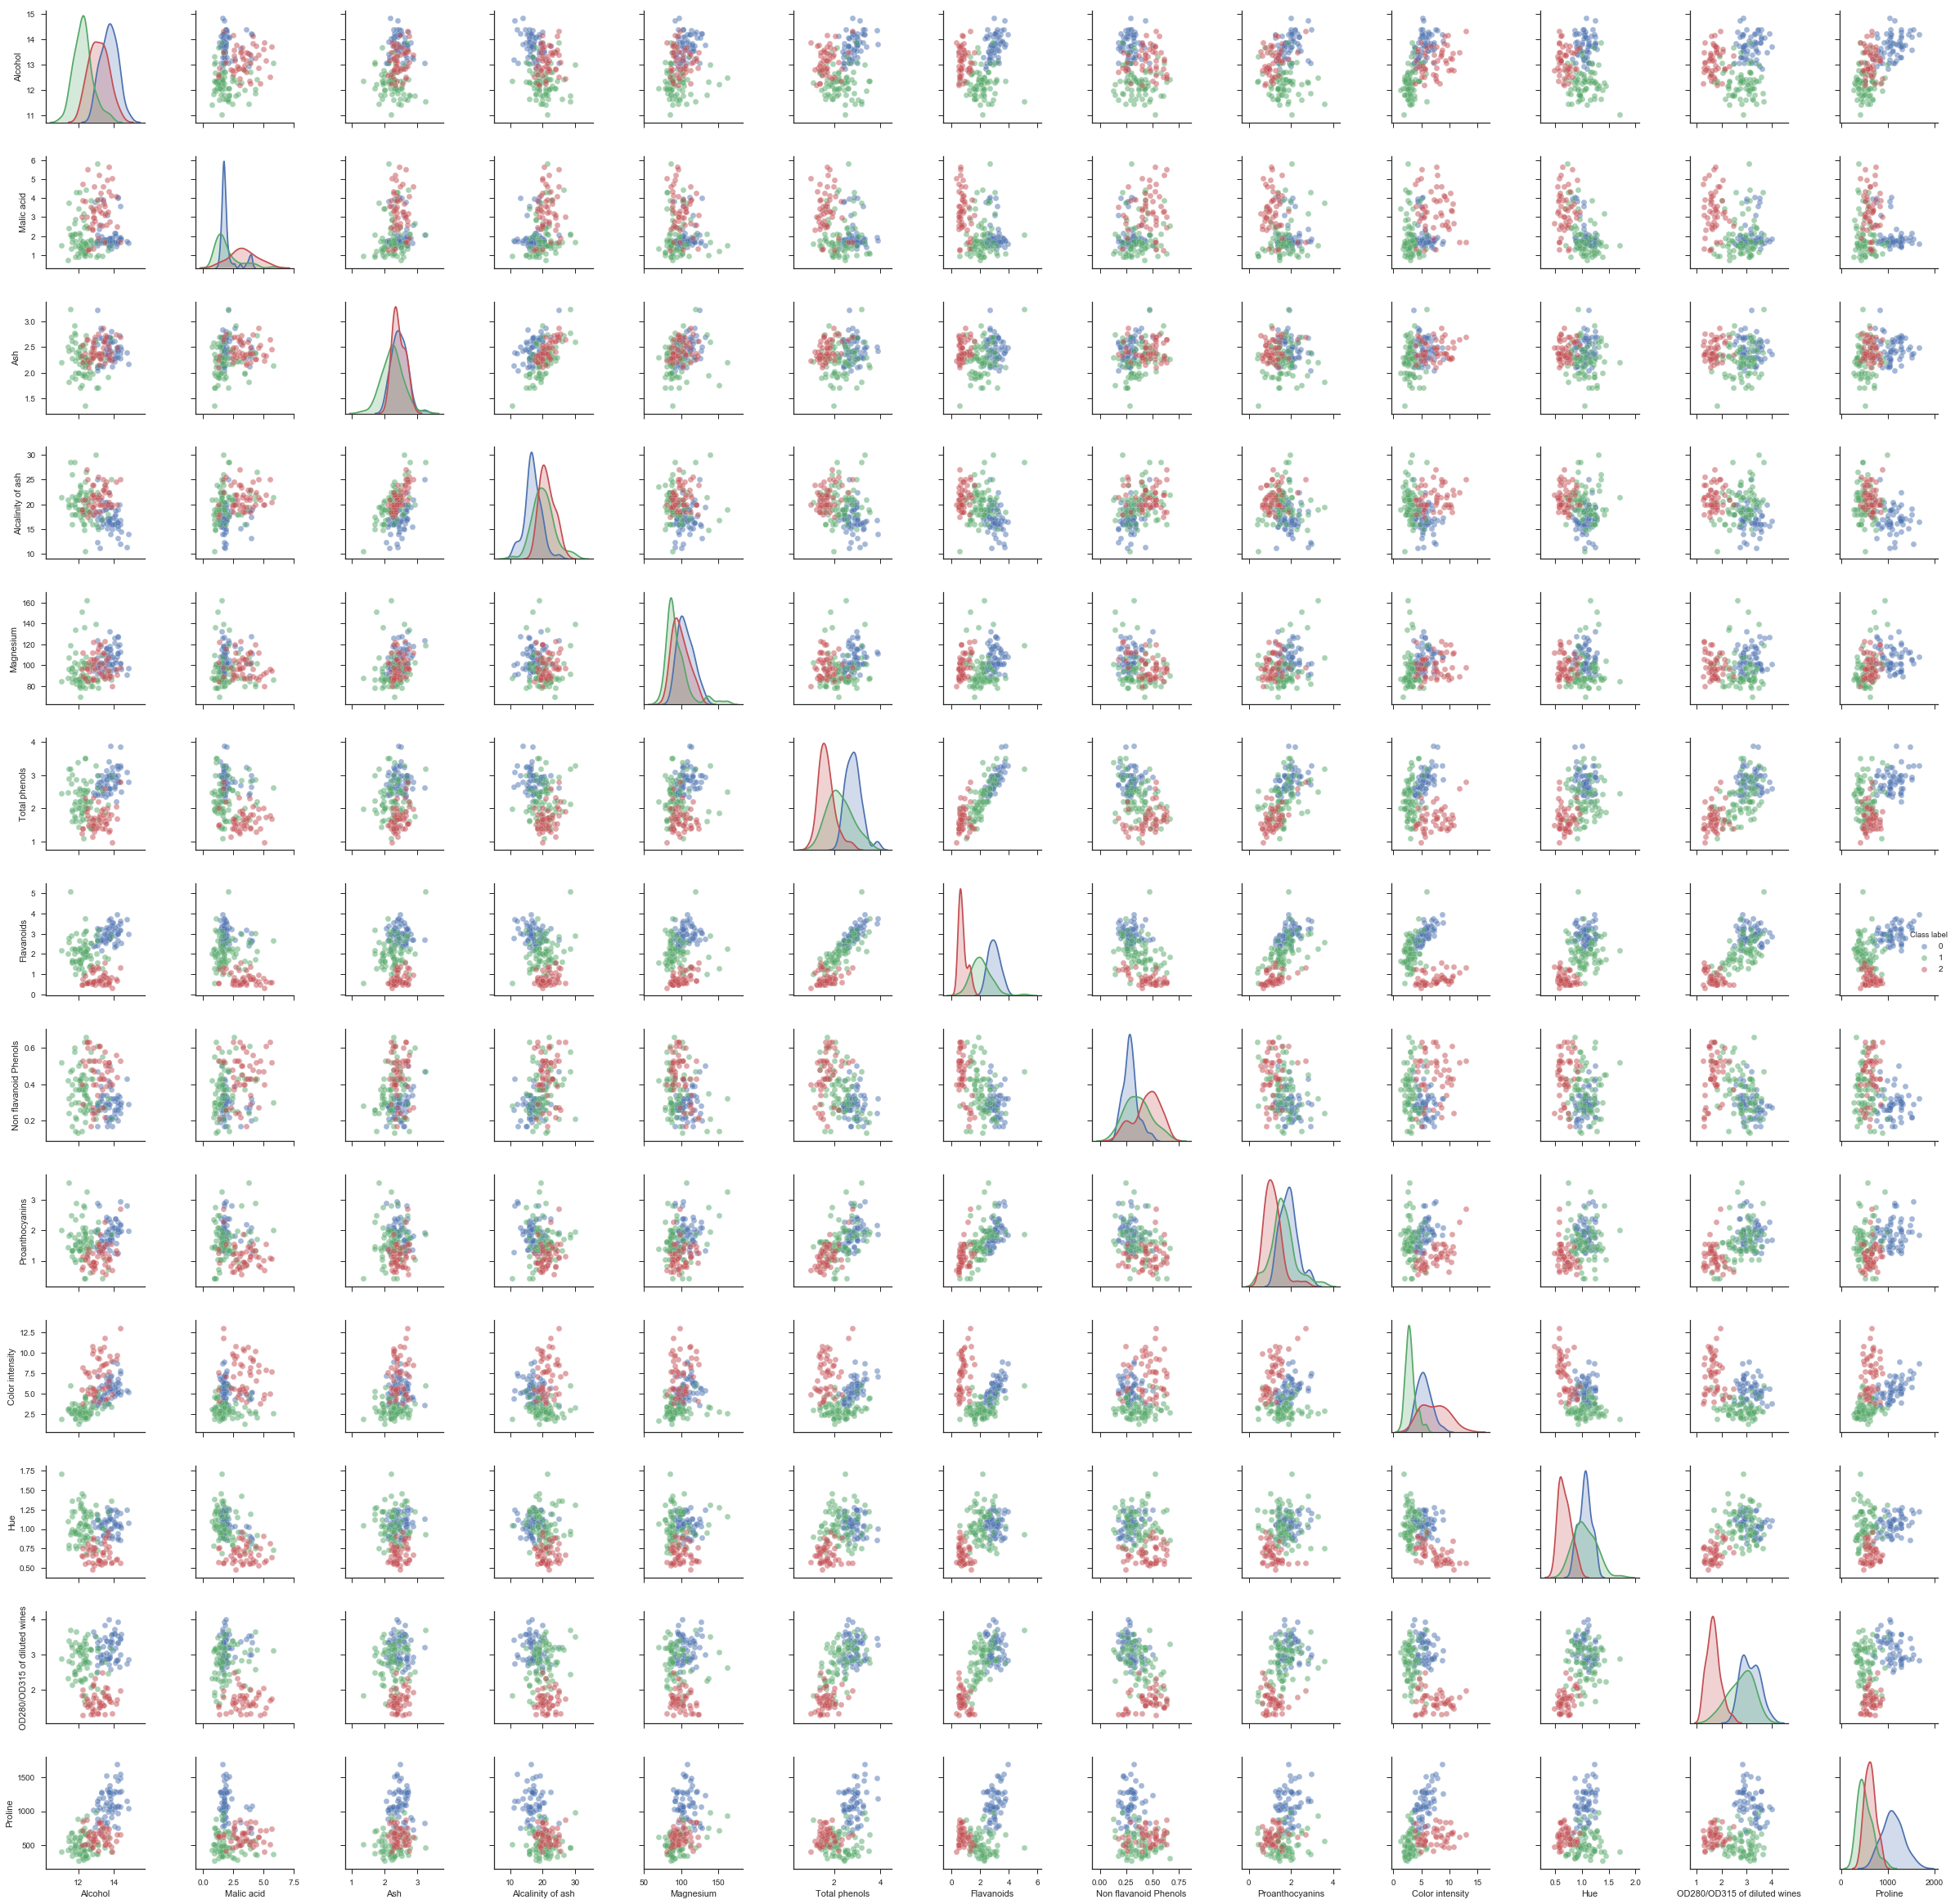

In [0]:
# Check distribution
sns.set(style='ticks')

# cols =['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Non flavanoid Phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
sns.pairplot(df, vars=cols, hue='Class label',diag_kind='kde',diag_kws=dict(shade=True), plot_kws={'alpha':0.5})
plt.tight_layout()
plt.show()

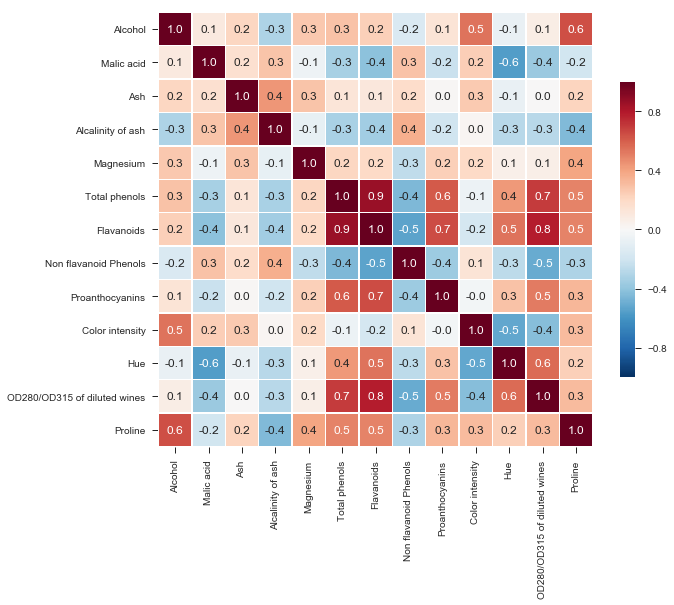

In [0]:
corr = df[cols].corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr,vmax=1.0,vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, cmap='RdBu_r', fmt=".1f")
#前のやつ　hm = sns.heatmap(corr, vmax=.3, center=0, linewidths=.5, cbar=True, cmap="RdBu", annot = True, square=True, fmt=".1f")

plt.tight_layout()
plt.show()

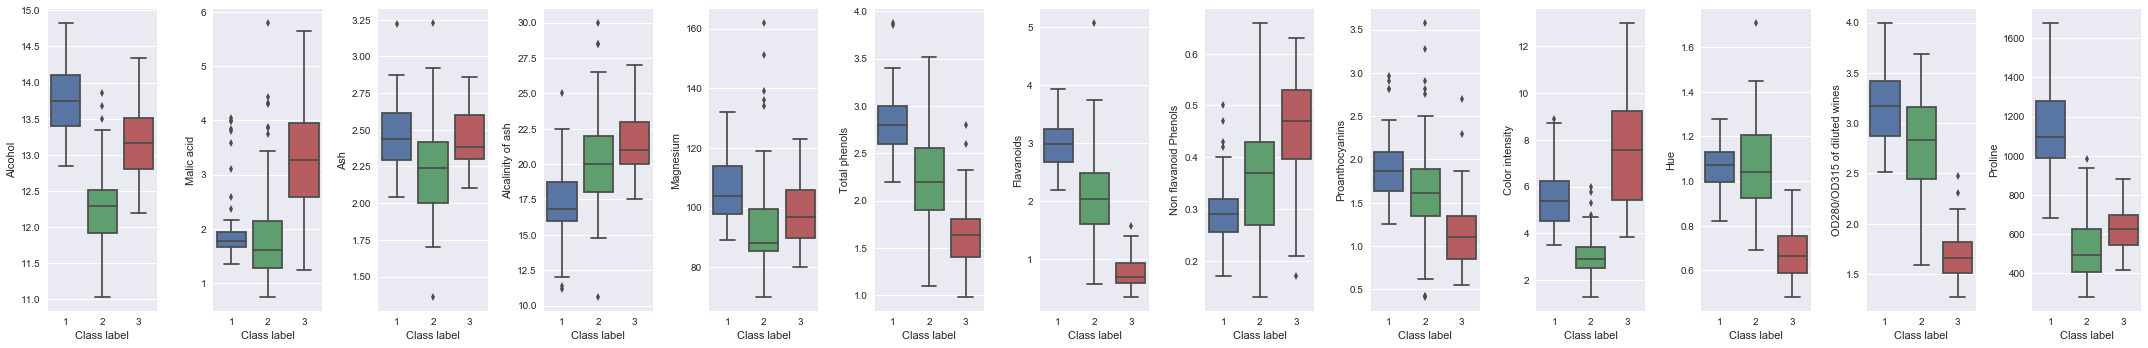

In [0]:
sns.set()

fig, axes = plt.subplots(1,13,figsize=(30,5))

for i in range(len(cols)):
    sns.boxplot(data=df, x="Class label", y=df[str(cols[i])], ax=axes[i])
    
plt.tight_layout()
plt.show()

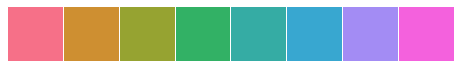

In [0]:
sns.palplot(sns.color_palette('husl',8))

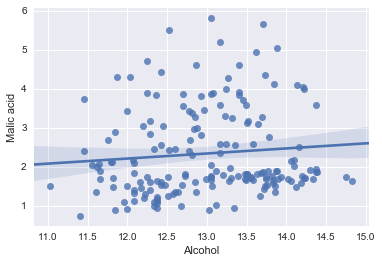

In [0]:
# regplotの書き方参考用　使わない
ax = sns.regplot(data=df,x=df['Alcohol'],y=df['Malic acid'])

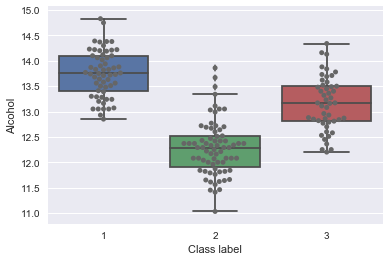

In [0]:
# boxplotの書き方参考用　使わない
ax = sns.boxplot(x="Class label", y="Alcohol", data=df)
ax = sns.swarmplot(x="Class label", y="Alcohol", data=df, color=".40")

### 2. Classifications
#### 2.1 Features

In [0]:
X_class = df.drop(['Class label'], axis=1)
X_class.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non flavanoid Phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
X_class.shape

(178, 13)

#### 2.2 Target

In [0]:
y_class = df.iloc[:,:1]
y_class.head()

,Class label
0,0
1,0
2,0
3,0
4,0


In [0]:
print(np.unique(y_class))

[0 1 2]


#### 2.3 Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#test size=30%
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
print(X_class.shape)
print(X_class_train.shape)
print(X_class_test.shape)

(178, 13)
(124, 13)
(54, 13)


#### 2.4 Clasifier Models

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [0]:
print('models.dtype:', type(models))
print(models)

models.dtype: <class 'list'>
[('Logistic Regression:', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('Naive Bayes:', GaussianNB(priors=None, var_smoothing=1e-09)), ('K-Nearest Neighbour:', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')), ('Decision Tree:', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('Support Vector Machine-linear:', SVC(C=1.0, cach

In [0]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_class_train,y_class_train.values.ravel(), cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 95.96153846153845
Naive Bayes: 96.02564102564102
K-Nearest Neighbour: 71.92307692307692
Decision Tree: 87.11538461538461
Support Vector Machine-linear: 96.02564102564102
Support Vector Machine-rbf: 42.37179487179487
Random Forest: 91.92307692307692
MLP: 31.41025641025641
AdaBoostClassifier: 89.42307692307693
GradientBoostingClassifier: 93.65384615384616
